In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ks_2samp
import warnings
warnings.filterwarnings("ignore")

In [30]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Doll03/4IZ480/main/Data/TimeDeposit_10K.csv', sep=";")


In [31]:
dataset.Time_Deposits_Flag.value_counts()


F    9897
T     103
Name: Time_Deposits_Flag, dtype: int64

In [32]:
dataset["Customer_ID"] = dataset["Customer_ID"].astype("object")
dataset["Birth_Date"] = dataset["Birth_Date"].astype("datetime64")
dataset["Ref_Date"] = dataset["Ref_Date"].astype("datetime64")
#dataset["Gender"] = [True if i == "Male" else False for i in dataset['Gender']]# 1=Male 0=Female
dataset["Gender"] = dataset["Gender"].astype("category")
dataset["Marital_Status"] = dataset["Marital_Status"].astype("category")
dataset["Children_Num"] = dataset["Children_Num"].astype("category")
dataset["Occupation_Category"] = dataset["Occupation_Category"].astype("category")
dataset["Payroll_Flag"] = dataset["Payroll_Flag"].astype("bool")
dataset["Business_Flag"] = dataset["Business_Flag"].astype("bool")
dataset["Saving_Current_Accounts_Flag"] = dataset["Saving_Current_Accounts_Flag"].astype("bool")
dataset["Investment_Products_Flag"] = dataset["Investment_Products_Flag"].astype("bool")
dataset["Insurance_Products_Flag"] = dataset["Insurance_Products_Flag"].astype("bool")
dataset["Business_Loans_Flag"] = dataset["Business_Loans_Flag"].astype("bool")
dataset["Housing_Loans_Flag"] = dataset["Housing_Loans_Flag"].astype("bool")
dataset["Consumer_Loans_Flag"] = dataset["Consumer_Loans_Flag"].astype("bool")
dataset["Credit_Cards_Flag"] = dataset["Credit_Cards_Flag"].astype("bool")
dataset["Time_Deposits_Flag"] = [True if i == "T" else False for i in dataset['Time_Deposits_Flag']]



In [33]:
dataset.Time_Deposits_Flag.value_counts()


False    9897
True      103
Name: Time_Deposits_Flag, dtype: int64

In [34]:
#Creating boolean variables 
dataset["Credit_Cards_Installments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Installments']]
dataset["Credit_Cards_Payments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Payments_Num']]
dataset["Credit_Cards_Purchases_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Purchases_Num']]
dataset["Credit_Cards_Witrhdrawals_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Witrhdrawals_Num']]
dataset["Internet_Trans_Flag"] = [True if i > 0 else False for i in dataset['Internet_Trans_Num']]
dataset["Deposit_Trans_Flag"] = [True if i > 0 else False for i in dataset['Deposit_Trans_Num']]
dataset["Payment_Trans_Flag"] = [True if i > 0 else False for i in dataset['Payment_Trans_Num']]
dataset["Transfer_Trans_Flag"] = [True if i > 0 else False for i in dataset['Transfer_Trans_Num']]
dataset["Withdrawl_Trans_Flag"] = [True if i > 0 else False for i in dataset['Withdrawl_Trans_Num']]

In [35]:
#Creating variable Age_Cat
dataset['Age'] = dataset['Ref_Date'].dt.year - dataset['Birth_Date'].dt.year
Age_Cat = pd.cut(dataset['Age'], bins=[0, 32.50, 51.50, 60.50, 150],labels=['Younger', 'LowerMid', 'UpperMid', 'Older'])
Age_Cat

0       LowerMid
1       LowerMid
2       UpperMid
3       UpperMid
4       LowerMid
          ...   
9995     Younger
9996    LowerMid
9997    LowerMid
9998    LowerMid
9999     Younger
Name: Age, Length: 10000, dtype: category
Categories (4, object): ['Younger' < 'LowerMid' < 'UpperMid' < 'Older']

In [36]:
#cat_v_list = [i for i in list(dataset.columns) if i not in num_v_list]
dataset['Time_Deposits_Flag']=dataset['Time_Deposits_Flag'].astype('category')

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Customer_ID                       10000 non-null  object        
 1   Gender                            10000 non-null  category      
 2   Birth_Date                        10000 non-null  datetime64[ns]
 3   Ref_Date                          10000 non-null  datetime64[ns]
 4   Marital_Status                    10000 non-null  category      
 5   Children_Num                      10000 non-null  category      
 6   Occupation_Category               10000 non-null  category      
 7   Total_Income                      10000 non-null  float64       
 8   Payroll_Flag                      10000 non-null  bool          
 9   Business_Flag                     10000 non-null  bool          
 10  Saving_Current_Accounts_Flag      10000 non-nul

In [38]:
dataset = dataset.drop(["Ref_Date","Birth_Date","Customer_ID","Age" ], axis = "columns", errors="ignore")

In [39]:
#crealing list of categorical variables
cat_v_list = [i for i in list(dataset.columns) if (dataset[i].dtypes in ['O', 'bool', "category"])]
cat_v_list.remove('Time_Deposits_Flag')

#creating list of numerical variables
num_v_list = [i for i in list(dataset.columns) if i not in cat_v_list]
num_v_list.remove('Time_Deposits_Flag')
print("Num:", num_v_list, "end=", "Cat:", cat_v_list)


Num: ['Total_Income', 'Saving_Current_Balance', 'Investment_Products_Balance', 'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance', 'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num', 'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num', 'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num', 'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount', 'Payment_Trans_Amount', 'Transfer_Trans_Amount', 'Credit_Cards_Installments', 'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num', 'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount', 'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount', 'Arrears_Months_Max'] end= Cat: ['Gender', 'Marital_Status', 'Children_Num', 'Occupation_Category', 'Payroll_Flag', 'Business_Flag', 'Saving_Current_Accounts_Flag', 'Investment_Products_Flag', 'Insurance_Products_Flag', 'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag', 'Credit

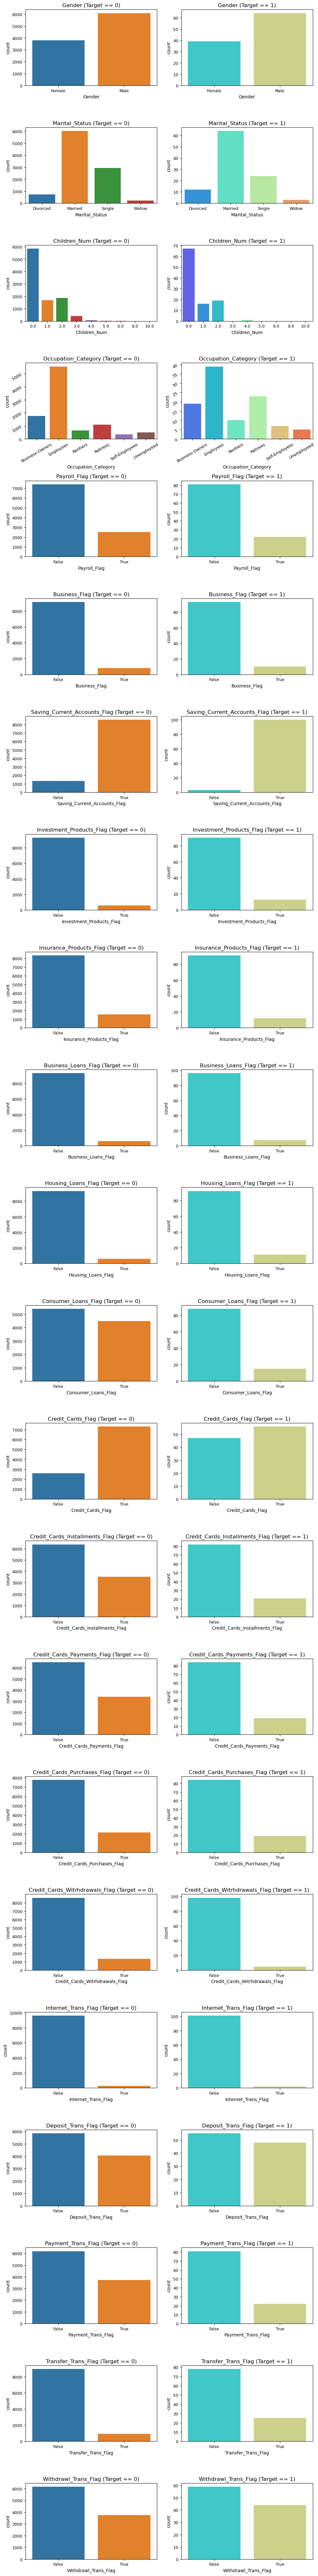

In [40]:
#Creating a list and graphs for storing categorical features.


figure,axis = plt.subplots(22,2, figsize=(10,80))

col_ind=0
axis_count = 0

for ax in axis.ravel():

    if axis_count % 2 == 0:
        sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == False], x=cat_v_list[col_ind], ax = ax)
        ax.set_title(cat_v_list[col_ind]+" (Target == 0)")

        if cat_v_list[col_ind] == "Occupation_Category":
            ax.tick_params(axis='both', which='major', labelsize=9, rotation = 30)
        else:
            ax.tick_params(axis='both', which='major', labelsize=9)
        
    else:
        sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == True], x=cat_v_list[col_ind], ax = ax, palette='rainbow')
        ax.set_title(cat_v_list[col_ind]+" (Target == 1)")

        if cat_v_list[col_ind] == "Occupation_Category":
            ax.tick_params(axis='both', which='major', labelsize=9, rotation = 30)
        else:
            ax.tick_params(axis='both', which='major', labelsize=9)

        col_ind += 1
        
    axis_count +=1

plt.tight_layout()
plt.show()

In [41]:
cat_v_list

['Gender',
 'Marital_Status',
 'Children_Num',
 'Occupation_Category',
 'Payroll_Flag',
 'Business_Flag',
 'Saving_Current_Accounts_Flag',
 'Investment_Products_Flag',
 'Insurance_Products_Flag',
 'Business_Loans_Flag',
 'Housing_Loans_Flag',
 'Consumer_Loans_Flag',
 'Credit_Cards_Flag',
 'Credit_Cards_Installments_Flag',
 'Credit_Cards_Payments_Flag',
 'Credit_Cards_Purchases_Flag',
 'Credit_Cards_Witrhdrawals_Flag',
 'Internet_Trans_Flag',
 'Deposit_Trans_Flag',
 'Payment_Trans_Flag',
 'Transfer_Trans_Flag',
 'Withdrawl_Trans_Flag']

In [93]:
#function for displaying contigency table and chi-square statistic

def chi_square(data, var1, var2 = "Time_Deposits_Flag", alpha = 0.05):


    data_crosstab = pd.crosstab(data[var1],data[var2], margins=True)

    chi2, p, dof, expected = chi2_contingency(data_crosstab, correction=False)

    print('The p-value is', p)
    print(expected)
    if p <= alpha:
        print(f'Result: We reject the null hypothesis: There is a relationship between {var1} and {var2}, therefore they are dependent.')
    else:
        print(f'Result: We fail to reject the null hypothesis: There is no relationship between {var1} and {var2}, therefore they are independent.')
    return data_crosstab

chi_square(dataset, "Gender")

The p-value is 0.9999770029434877
[[ 3802.4274    39.5726  3842.    ]
 [ 6094.5726    63.4274  6158.    ]
 [ 9897.       103.     10000.    ]]
Result: We fail to reject the null hypothesis: There is no relationship between Gender and Time_Deposits_Flag, therefore they are independent.


Time_Deposits_Flag,False,True,All
Gender,,,
Female,3803,39,3842
Male,6094,64,6158
All,9897,103,10000


In [43]:
#phi koefficient and heatmap
from sklearn.metrics import matthews_corrcoef

help(matthews_corrcoef)

Help on function matthews_corrcoef in module sklearn.metrics._classification:

matthews_corrcoef(y_true, y_pred, *, sample_weight=None)
    Compute the Matthews correlation coefficient (MCC).
    
    The Matthews correlation coefficient is used in machine learning as a
    measure of the quality of binary and multiclass classifications. It takes
    into account true and false positives and negatives and is generally
    regarded as a balanced measure which can be used even if the classes are of
    very different sizes. The MCC is in essence a correlation coefficient value
    between -1 and +1. A coefficient of +1 represents a perfect prediction, 0
    an average random prediction and -1 an inverse prediction.  The statistic
    is also known as the phi coefficient. [source: Wikipedia]
    
    Binary and multiclass labels are supported.  Only in the binary case does
    this relate to information about true and false positives and negatives.
    See references below.
    
    Read 

<h1><b>TEST<b><h1>

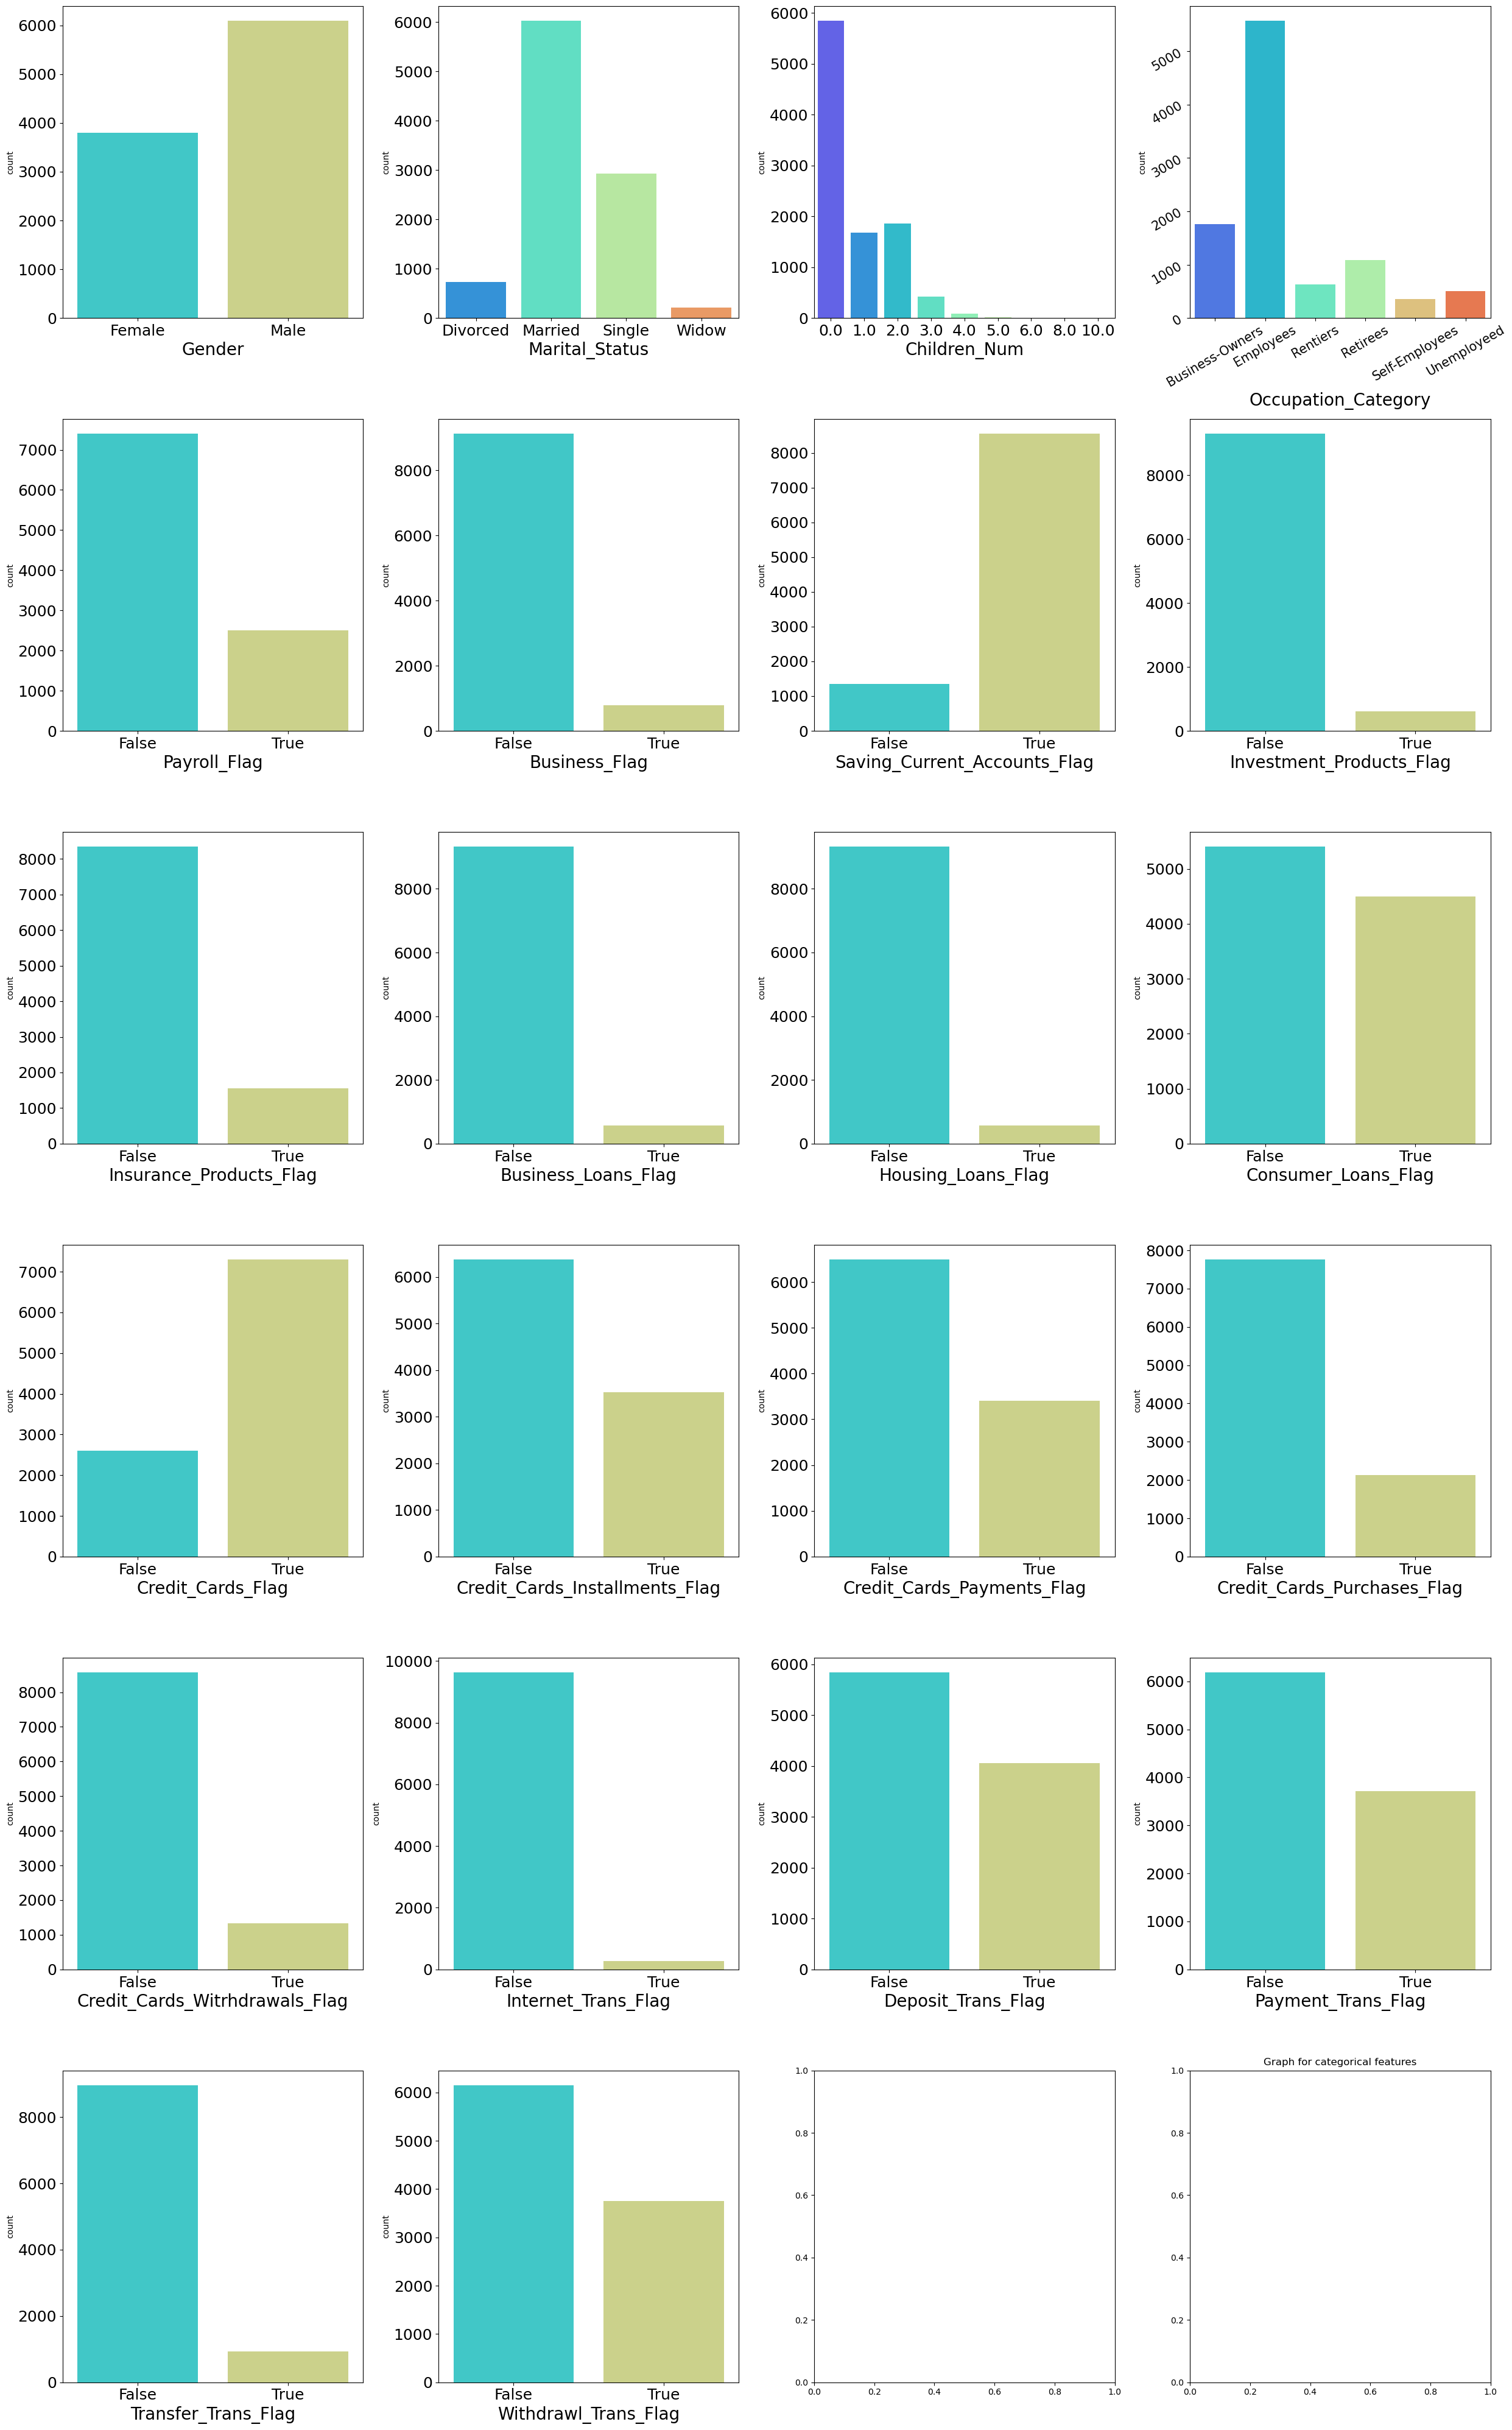

In [44]:
#Creating a list and graphs for storing categorical features.
#cat_v_list = [i for i in list(dataset.columns) if i not in num_v_list]
dataset['Time_Deposits_Flag']=dataset['Time_Deposits_Flag'].astype('category')

figure,axis = plt.subplots(6,4, figsize=(25,40))

for column,ax in zip(cat_v_list,axis.ravel()):
    sns.countplot(data=dataset[dataset["Time_Deposits_Flag"] == False], x=column, ax = ax, palette='rainbow')
    if column == "Occupation_Category":
        ax.tick_params(axis='both', which='major', labelsize=15, rotation = 30)
    else:
        ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel (column, size = 20) 

plt.title('Graph for categorical features')
plt.tight_layout()
plt.show()

False    0.9897
True     0.0103
Name: Time_Deposits_Flag, dtype: float64


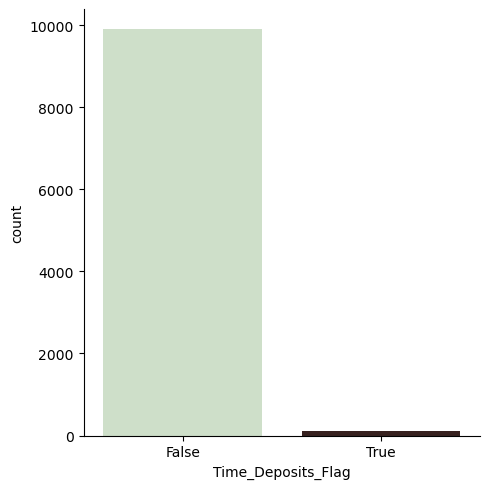

In [45]:

print(dataset["Time_Deposits_Flag"].value_counts(normalize=True))
sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.79")
plt.show()